In [1]:
import numpy as np
import re

#INPUT_FN = "input_test.txt"
#INPUT_FN = "input_test2.txt"
#INPUT_FN = "input_test3.txt"
INPUT_FN = "input.txt"

In [2]:
with open(INPUT_FN) as f:
    lines = [l.rstrip() for l in f]

Read all possible nodes, can be a dict, with all connections

Then execute instructions

In [3]:
instructions = lines[0]
instructions

'LLRLLRRLRLRRRLRRLLRRRLRLRLRRLRRRLRRLRLRLLRLLLRRRLRRLRRRLRRRLRRRLRLRRLLRRLRRLRRLRRRLRLRRRLLRLRRLRRRLRLRRRLRRRLRLRRRLLRRRLRRRLRLRRLRLRRRLLRRLRRLRRLRRLRLRLRRRLLRRRLRRLRRRLRLRLRRRLLRLRRLLRLRRLRLRRRLRLRRLLRRRLLRRLRLRLLRLLRRLRRLLRRLRLRRLRLRLRRRLRRLRLLLLRRLRLRLRRRLLLRRRLRRLRRLRLLRLRRRLLLRRRLRRRLRRRR'

In [4]:
nodes_txt = lines[2:]
nodes_txt

['NQT = (TXC, RVJ)',
 'FPT = (PNS, KJL)',
 'BNQ = (THG, LCV)',
 'SPL = (VBH, NNV)',
 'TLM = (LVQ, PGT)',
 'GHC = (XKN, SPR)',
 'PHT = (HMF, DST)',
 'FSF = (JCM, SMT)',
 'GDD = (FHJ, RBS)',
 'GVR = (FVD, FVD)',
 'SST = (PMF, MGC)',
 'ZZZ = (VLV, SQV)',
 'SDV = (DBL, GTL)',
 'XSP = (GRV, RFM)',
 'SKG = (NGH, VDX)',
 'BPK = (RMK, LCQ)',
 'VSC = (DRN, SFR)',
 'BFR = (BJR, GMD)',
 'HTM = (PFM, LVD)',
 'XVP = (LDP, LDP)',
 'DRD = (SCH, LKD)',
 'DSJ = (GSQ, JTN)',
 'VTS = (BNQ, VFX)',
 'KVF = (HTP, MQK)',
 'GPS = (FXQ, TPF)',
 'VRC = (RTK, RTK)',
 'HRD = (PMQ, JCR)',
 'DJK = (FTC, KXH)',
 'VGJ = (PCJ, TVH)',
 'QMN = (TLC, HNG)',
 'DMH = (QSD, PDP)',
 'CRL = (VFR, MDR)',
 'XGV = (CMV, FTV)',
 'XJX = (HTM, HHG)',
 'SQP = (XKK, KJF)',
 'PXZ = (JCK, PTH)',
 'BDV = (JMH, CND)',
 'FBD = (CQS, QCN)',
 'TRS = (FGM, NKF)',
 'TLC = (HBC, FRC)',
 'DKR = (LCP, VLD)',
 'GTF = (QHD, PBB)',
 'NCC = (HJF, LNR)',
 'KGS = (KPF, GTB)',
 'CPQ = (SLR, DRD)',
 'RJQ = (KXK, BFR)',
 'XSQ = (PNN, NMG)',
 'DVP = (MBH,

In [5]:
# process notes_text to a dict
# At the same time, get all the nodes ending with A
# and ending with Z
nodes  = dict()
nodes_end_A = list()
nodes_end_Z = list()

for l0 in nodes_txt:
    left, right = l0.split(' = ')
    node1, node2  = right.removesuffix(')').removeprefix('(').split(', ')
    nodes[left] = (node1,node2)

    if left[-1]=='A':
        nodes_end_A.append(left)
    elif left[-1]=='Z':
        nodes_end_Z.append(left)
nodes

{'NQT': ('TXC', 'RVJ'),
 'FPT': ('PNS', 'KJL'),
 'BNQ': ('THG', 'LCV'),
 'SPL': ('VBH', 'NNV'),
 'TLM': ('LVQ', 'PGT'),
 'GHC': ('XKN', 'SPR'),
 'PHT': ('HMF', 'DST'),
 'FSF': ('JCM', 'SMT'),
 'GDD': ('FHJ', 'RBS'),
 'GVR': ('FVD', 'FVD'),
 'SST': ('PMF', 'MGC'),
 'ZZZ': ('VLV', 'SQV'),
 'SDV': ('DBL', 'GTL'),
 'XSP': ('GRV', 'RFM'),
 'SKG': ('NGH', 'VDX'),
 'BPK': ('RMK', 'LCQ'),
 'VSC': ('DRN', 'SFR'),
 'BFR': ('BJR', 'GMD'),
 'HTM': ('PFM', 'LVD'),
 'XVP': ('LDP', 'LDP'),
 'DRD': ('SCH', 'LKD'),
 'DSJ': ('GSQ', 'JTN'),
 'VTS': ('BNQ', 'VFX'),
 'KVF': ('HTP', 'MQK'),
 'GPS': ('FXQ', 'TPF'),
 'VRC': ('RTK', 'RTK'),
 'HRD': ('PMQ', 'JCR'),
 'DJK': ('FTC', 'KXH'),
 'VGJ': ('PCJ', 'TVH'),
 'QMN': ('TLC', 'HNG'),
 'DMH': ('QSD', 'PDP'),
 'CRL': ('VFR', 'MDR'),
 'XGV': ('CMV', 'FTV'),
 'XJX': ('HTM', 'HHG'),
 'SQP': ('XKK', 'KJF'),
 'PXZ': ('JCK', 'PTH'),
 'BDV': ('JMH', 'CND'),
 'FBD': ('CQS', 'QCN'),
 'TRS': ('FGM', 'NKF'),
 'TLC': ('HBC', 'FRC'),
 'DKR': ('LCP', 'VLD'),
 'GTF': ('QHD', 

In [6]:
nodes_end_A

['GSA', 'DLA', 'MLA', 'MQA', 'AAA', 'JGA']

In [7]:
nodes_end_Z

['ZZZ', 'PXZ', 'TFZ', 'QLZ', 'XJZ', 'DXZ']

Find nodes ending with A and ZZ

Now just need to start at nodes ending with A and follow instructions until having all nodes ending with Z

In [8]:
steps = 0
positions = nodes_end_A.copy() # copy

while True:
    all_end_in_Z=True
    for i0 in instructions:
        #print(f"step: {steps}, positions: {positions} ")
        for ip, p0 in enumerate(positions):

            left,right = nodes[p0]

            if i0=='L':
                positions[ip] = left
            elif i0=='R':
                positions[ip] = right
            else:
                print (f"ERROR {i0} not a valid instruction")
                break
        
        steps+=1

        # check if all positions have end in Z
        all_end_in_Z = True
        for p0 in positions:
            if p0[-1]!='Z':
                all_end_in_Z=False
                break
        
        if all_end_in_Z:
            print(f"Positions all end in Z {positions} at step {steps}")
            break
    if all_end_in_Z:
        break


KeyboardInterrupt: 

In [9]:
steps

1480625418

50 mins runnning and no answer yet (steps=1480625418). The solution could be a very large number


Unfortunately the jumps depend on the instructions so it is not possible to assume a constant-jump from Z to Z

Looking at the input there appears to be a pattern of requirement for several Right moves RRR to reach a node ending with Z.

Maybe I should do a "backwards" graph analysis.

Just a note, in the "instructions" the maximum number of consecutive R's is 4, and there is only one of them at the end of the instruction string. Maybe this was intentional.

Or maybe there is only a specific pattern to reach each of the end Z's (6 in total) from any node.

In [8]:
import networkx

In [54]:
endz_graphs = []
max_depth = 20

for nz in nodes_end_A:
    g0 = networkx.DiGraph()

    # Do a BFS-kind
    
    to_visit_now = [nz]
    depth=1
    g0.add_node(nz, depth=0)

    
    while True:
        to_visit_later = set()
        while len(to_visit_now)>0:
            #Create the node
            n0 = to_visit_now.pop()

            nleft,nright = nodes[n0]

            #Add these nodes to graph
            #g0.add_node(nleft)
            #g0.add_node(nright)

            g0.add_edge(n0, nleft, label='L')
            g0.add_edge(n0, nright, label='R')

            g0.nodes[nleft]["depth"] = depth
            g0.nodes[nright]["depth"] = depth

            to_visit_later.add(nleft)
            to_visit_later.add(nright)

        depth+=1
        if depth>max_depth:
            break
        to_visit_now=list(to_visit_later)
    
    endz_graphs.append(g0)


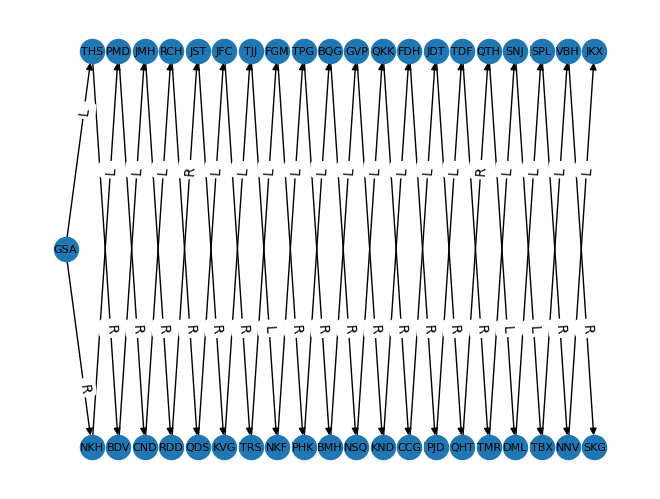

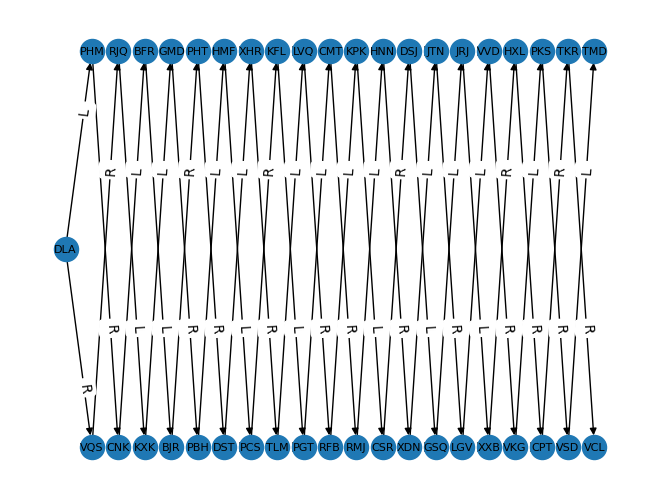

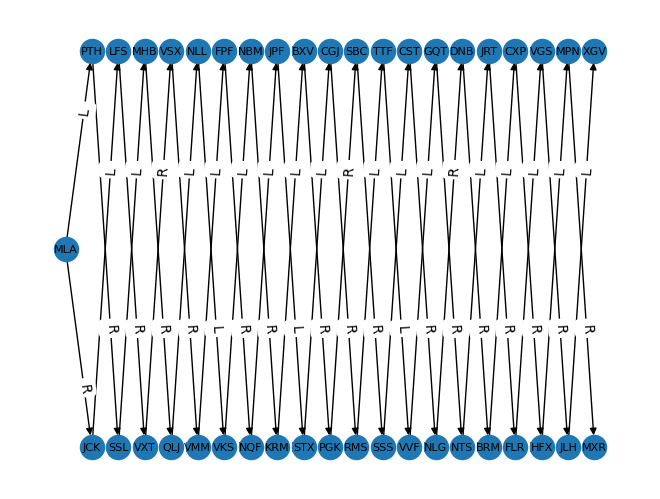

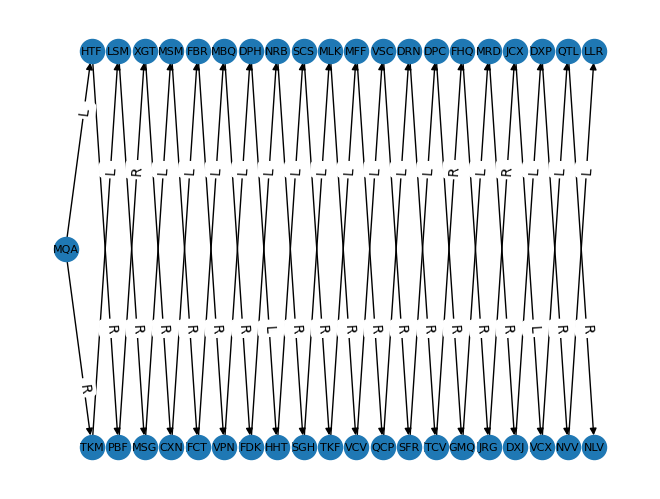

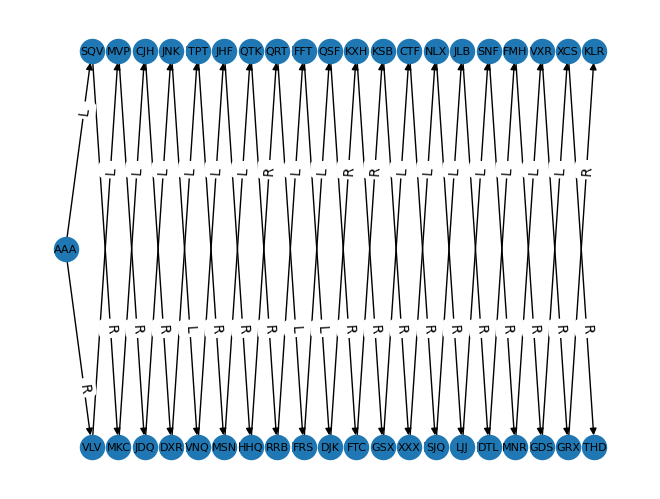

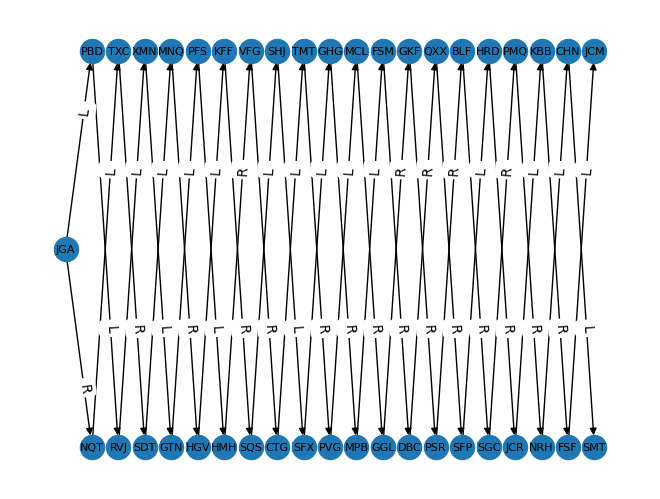

In [55]:
import matplotlib.pyplot as plt

for g0 in endz_graphs:
    # pos = networkx.spring_layout(g0)
    pos = networkx.multipartite_layout(g0, subset_key="depth")

    networkx.draw(g0, pos, with_labels=True, font_size=8)

    edge_labels = networkx.get_edge_attributes(g0, 'label')
    
    networkx.draw_networkx_edge_labels(g0,  pos, edge_labels=edge_labels, label_pos=0.3)
    plt.show()

Non overlapping

In [56]:
len(nodes)

738

In [57]:
# Assuming 6 routes to endZ nodes, how many non overlapping nodes per route are there to reach endz
738//6 

123

In [58]:
(738//6 -2 )//2

60

Estimated depth is 60

Depth until reaching an endZ node

In [137]:
endz_graphs = []
max_depth = 80

endA_to_endZ_depths={}

for nA in nodes_end_A:
    g0 = networkx.DiGraph()

    # Do a BFS-kind
    
    to_visit_now = [nA]
    depth=1
    g0.add_node(nA, depth=0)

    b_reached_z = False
    adj_max_depth = max_depth
    nZ = None
    while True:
        #print(f"depth:{depth} to_visit_now: {to_visit_now}")
        to_visit_later = set()
        while len(to_visit_now)>0:
            #Create the node
            n0 = to_visit_now.pop()

            nleft,nright = nodes[n0]

            if nleft not in g0.nodes:
                g0.add_node(nleft, depth=depth)
            if nright not in g0.nodes:
                g0.add_node(nright, depth=depth)
            
            g0.add_edge(n0, nleft, label='L')
            g0.add_edge(n0, nright, label='R')

            to_visit_later.add(nleft)
            to_visit_later.add(nright)

            if nleft[-1]=='Z' or nright[-1]=='Z':
                print(f"Reached node with endZ at depth {depth}")
                if nleft[-1]=='Z':
                    nZ = (nleft, depth)
                else:
                    nZ = (nright,depth)

                b_reached_z=True
                break

        depth+=1

        if depth>adj_max_depth:
            print("Reached adj_max_depth")
            break
        if b_reached_z:
            adj_max_depth=0 #one more depth
            b_reached_z=False
            #break
        
        to_visit_now=list(to_visit_later)
    
    endz_graphs.append(g0)
    endA_to_endZ_depths[nA] = (nZ)


Reached node with endZ at depth 67
Reached adj_max_depth
Reached node with endZ at depth 59
Reached adj_max_depth
Reached node with endZ at depth 43
Reached adj_max_depth
Reached node with endZ at depth 79
Reached adj_max_depth
Reached node with endZ at depth 47
Reached adj_max_depth
Reached node with endZ at depth 71
Reached adj_max_depth


In [138]:
endA_to_endZ_depths

{'GSA': ('DXZ', 67),
 'DLA': ('XJZ', 59),
 'MLA': ('PXZ', 43),
 'MQA': ('QLZ', 79),
 'AAA': ('ZZZ', 47),
 'JGA': ('TFZ', 71)}

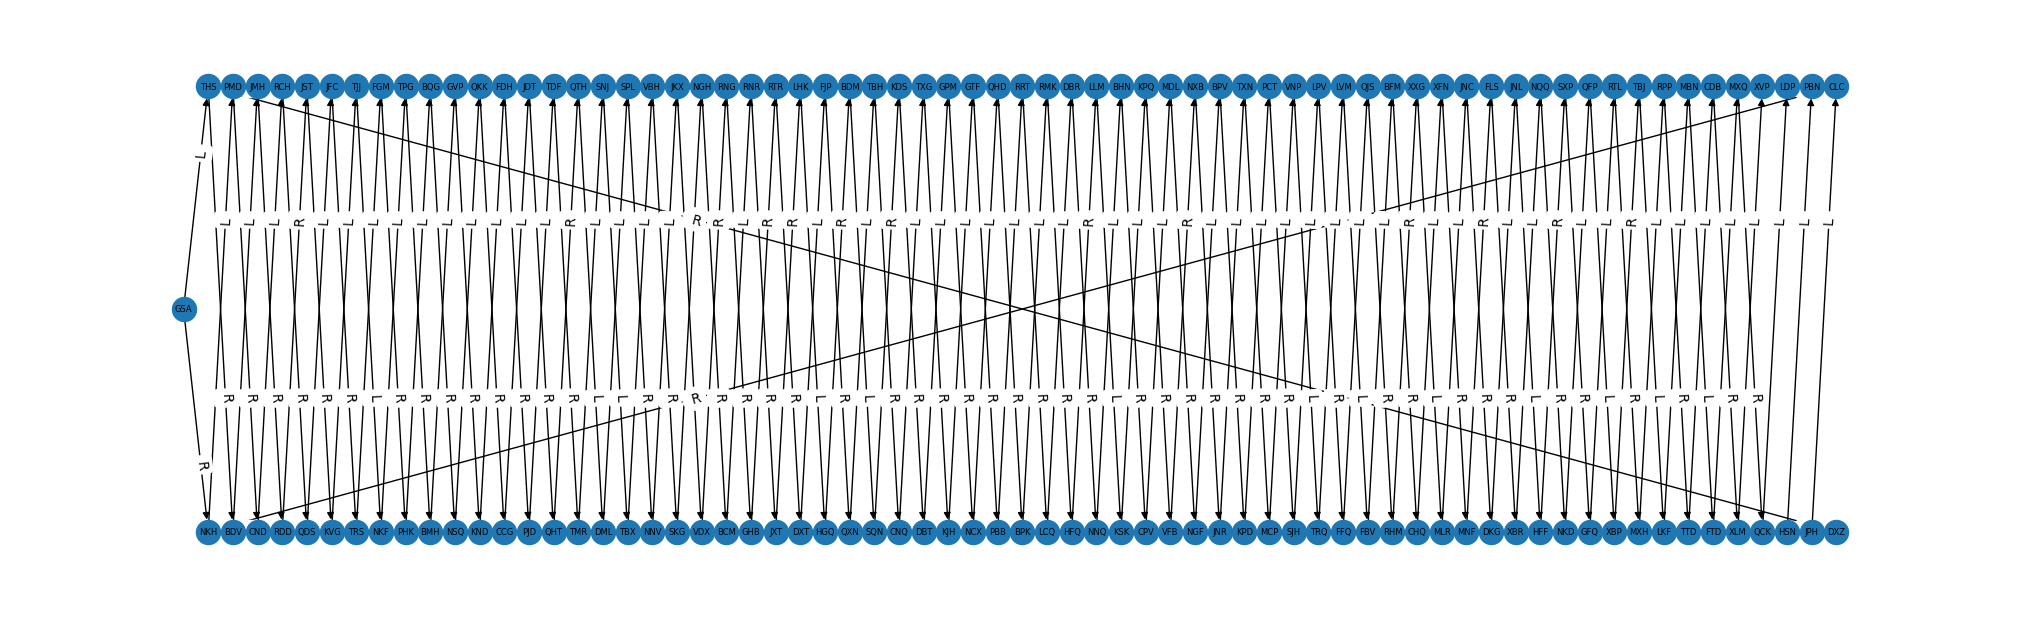

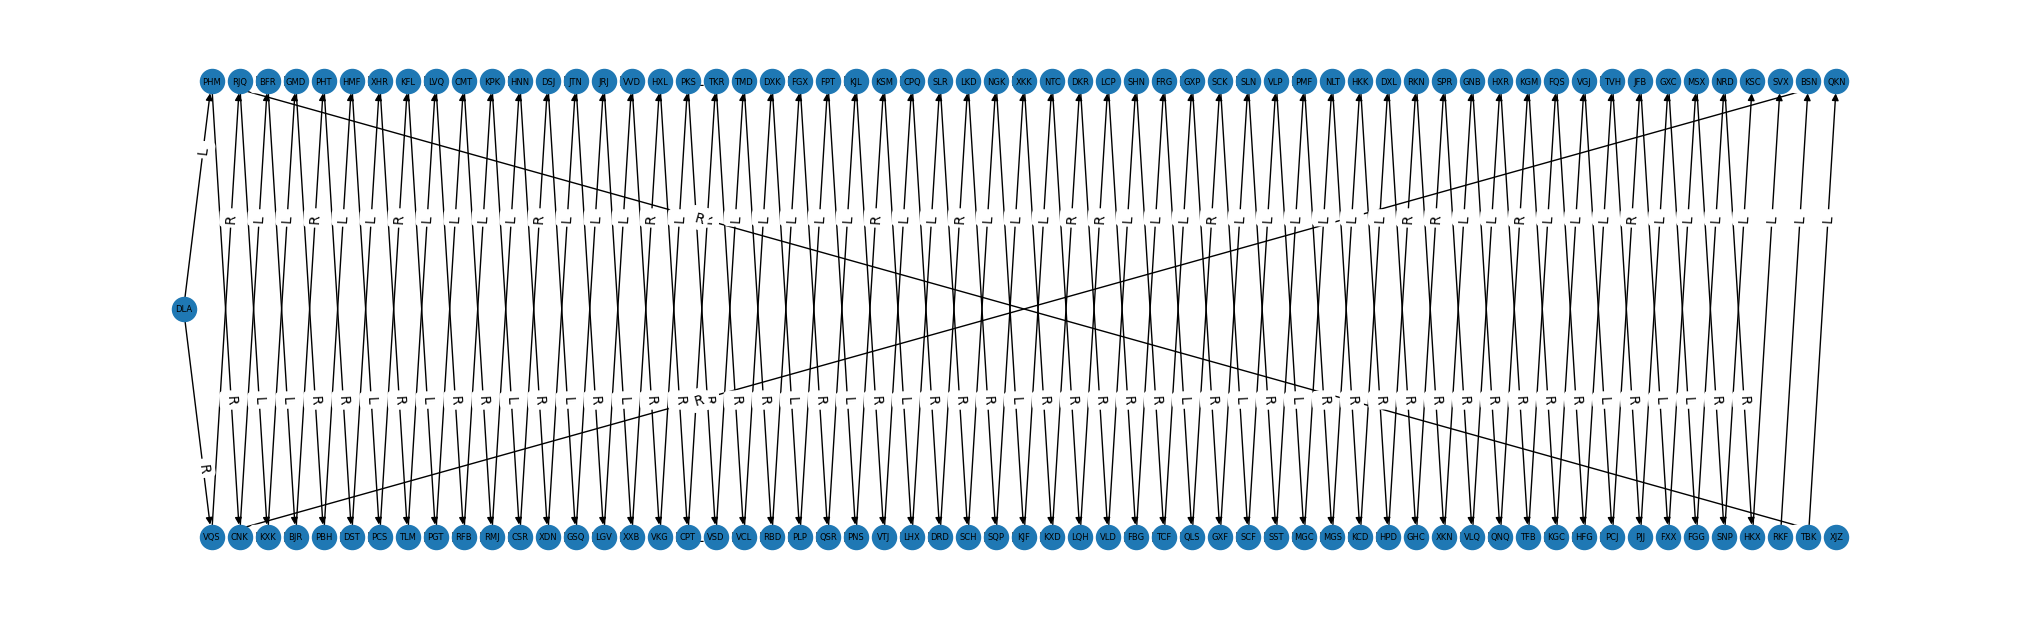

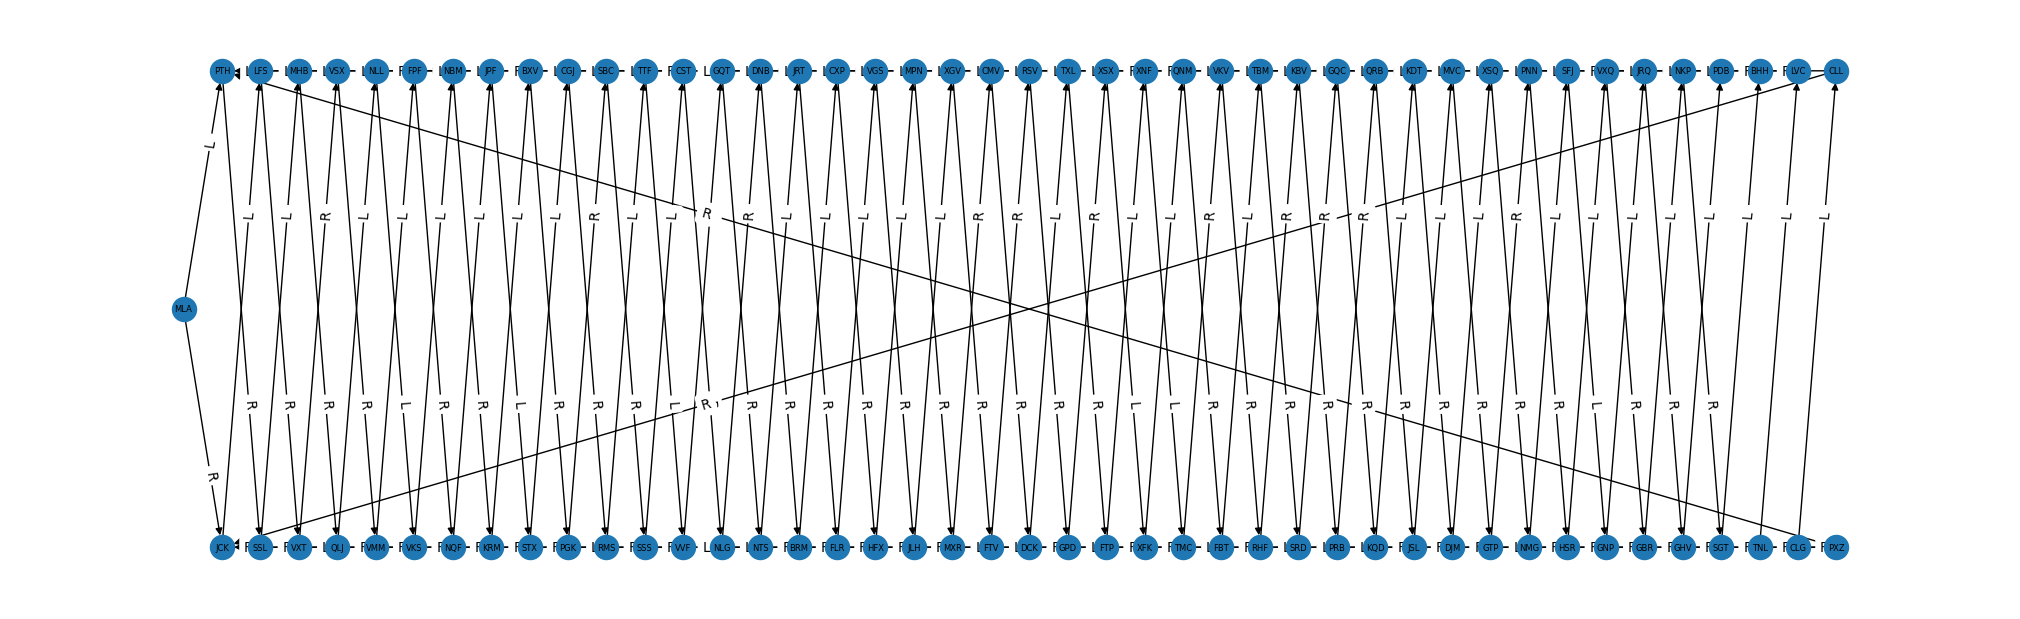

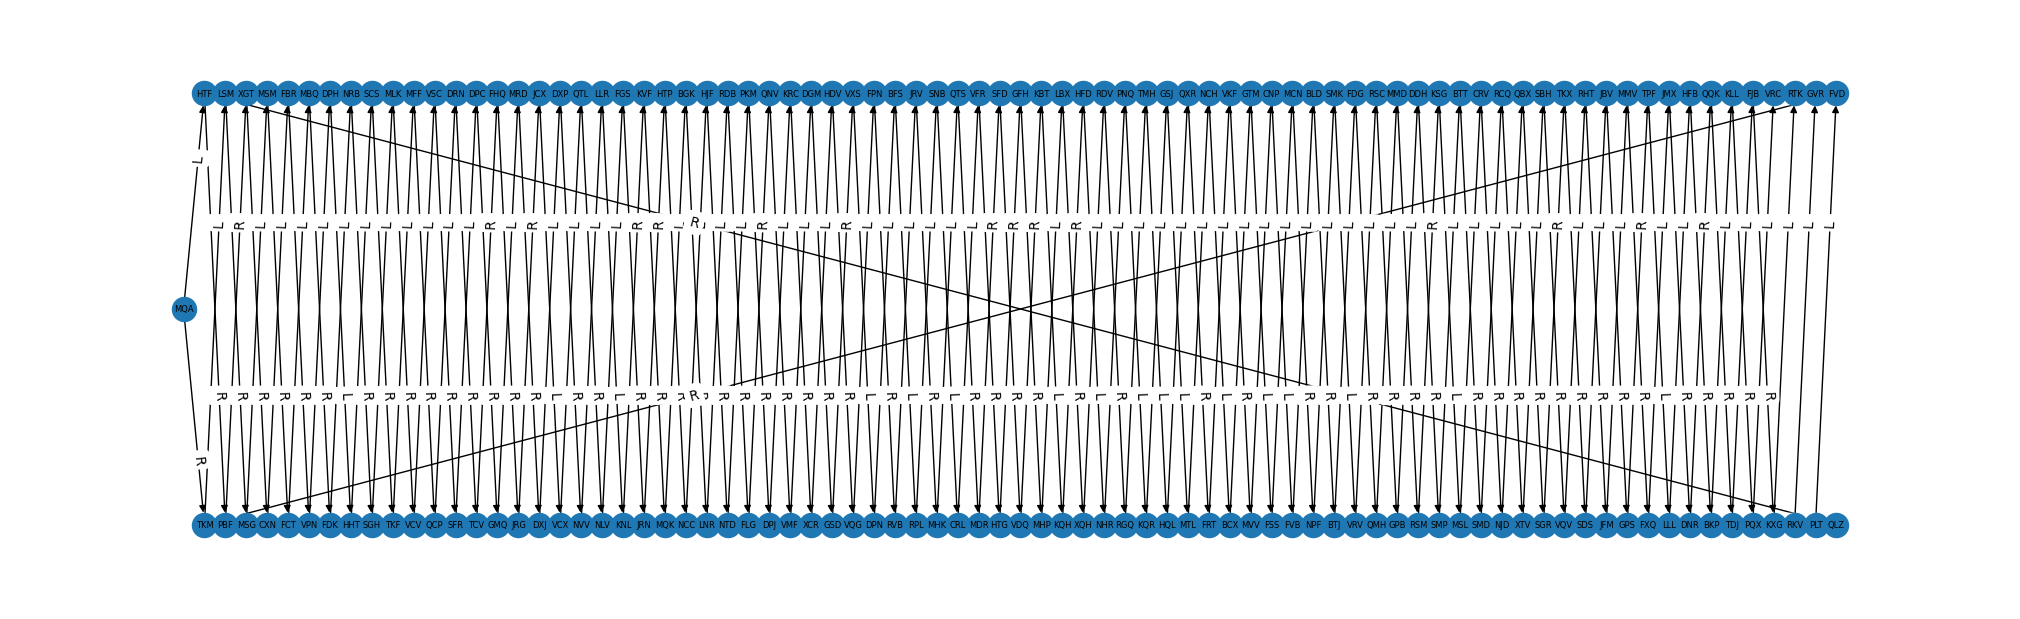

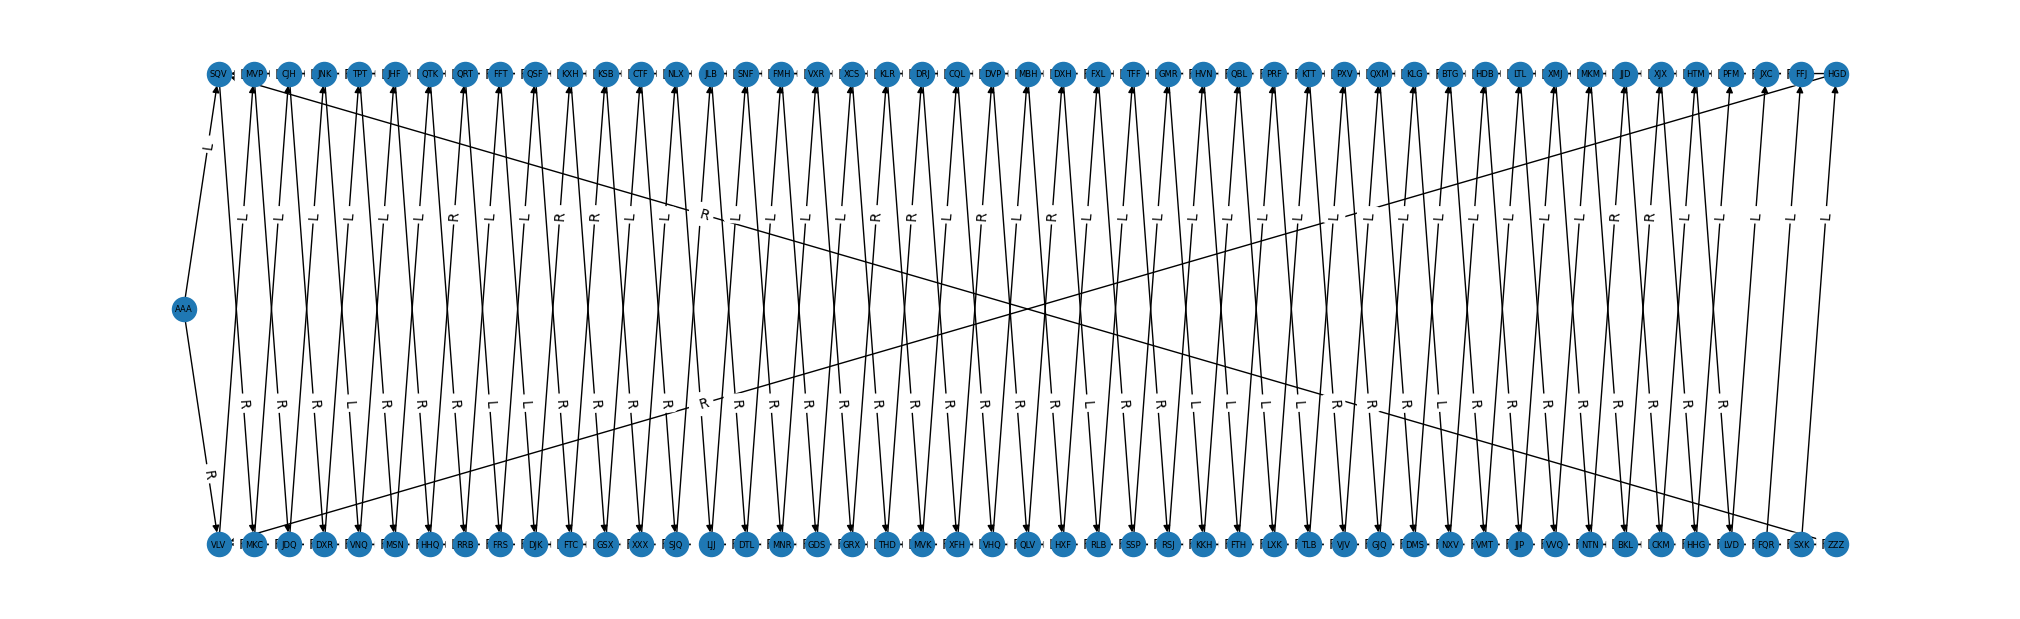

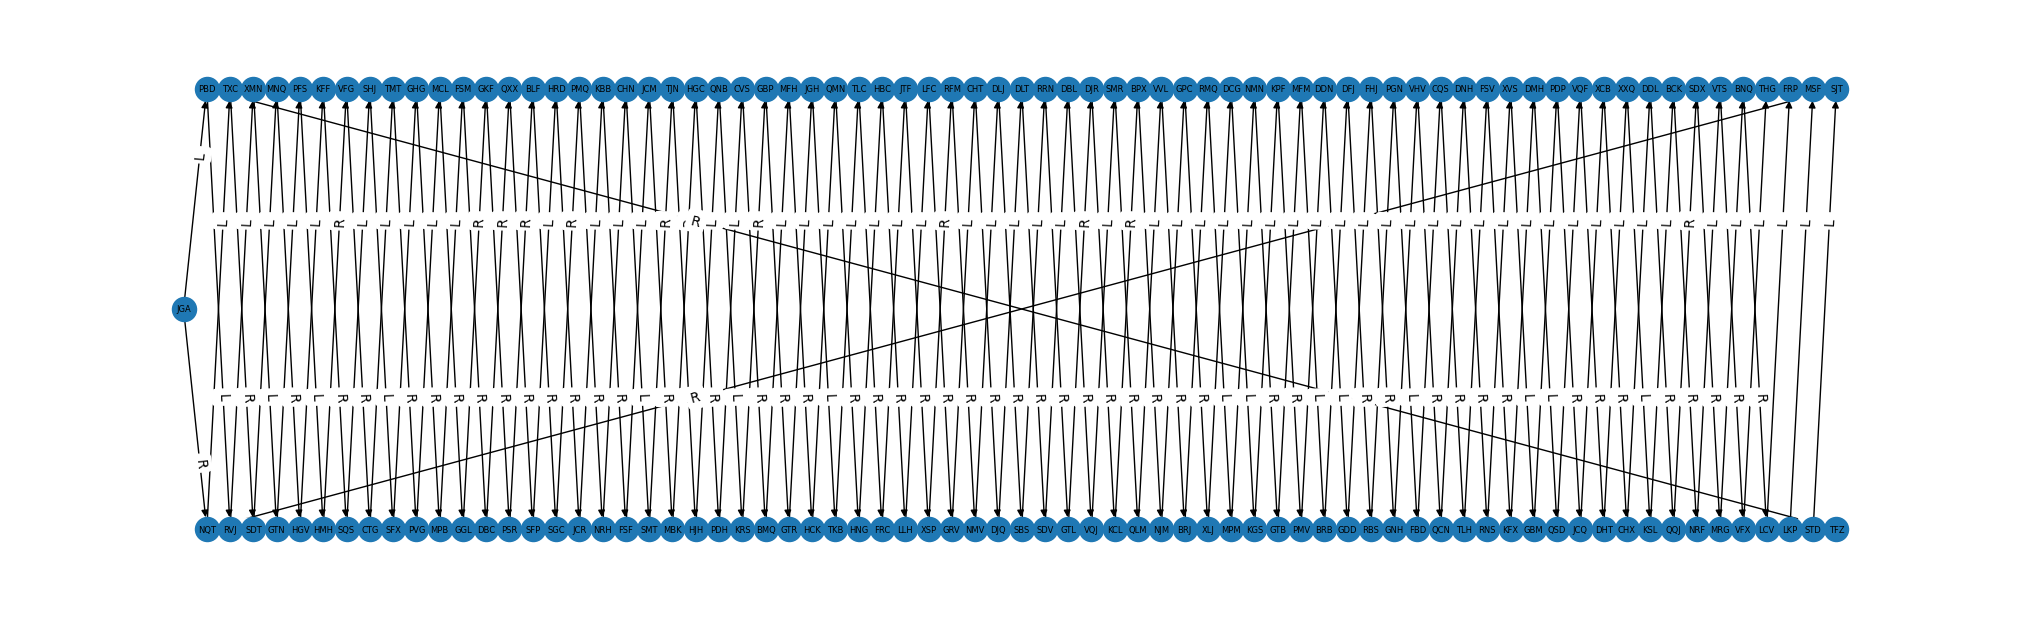

In [139]:
import matplotlib.pyplot as plt

for g0 in endz_graphs:
    plt.figure(figsize=(20,6))
    # pos = networkx.spring_layout(g0)
    pos = networkx.multipartite_layout(g0, subset_key="depth")

    networkx.draw(g0, pos, with_labels=True, font_size=6)

    edge_labels = networkx.get_edge_attributes(g0, 'label')
    
    networkx.draw_networkx_edge_labels(g0,  pos, edge_labels=edge_labels, label_pos=0.3)
    
    plt.show()

# Check endpoints of each of the endA's

In [140]:
endA_to_endZ=dict()

for nA in nodes_end_A:
    steps = 0
    position = nA
    while True:
        for i0 in instructions:
            left,right = nodes[position]
            #print(f"step {steps} , pos {position}, instruction {i0}  to chose of {left}, {right}")
            if i0=='L':
                position = left
            elif i0=='R':
                position = right
            else:
                print (f"ERROR {i0} not a valid instruction")
                break
            
            steps+=1
            if position[-1]=='Z':
                print(f"From {nA}, Found end {position} in steps:{steps}")
                endA_to_endZ[nA]=(position, steps)
                break
        if position[-1]=='Z':
            break
endA_to_endZ

From GSA, Found end DXZ in steps:19631
From DLA, Found end XJZ in steps:17287
From MLA, Found end PXZ in steps:12599
From MQA, Found end QLZ in steps:23147
From AAA, Found end ZZZ in steps:13771
From JGA, Found end TFZ in steps:20803


{'GSA': ('DXZ', 19631),
 'DLA': ('XJZ', 17287),
 'MLA': ('PXZ', 12599),
 'MQA': ('QLZ', 23147),
 'AAA': ('ZZZ', 13771),
 'JGA': ('TFZ', 20803)}

In [141]:
endA_to_endZ_depths['GSA']

('DXZ', 67)

In [143]:
# check if LCM gives right answer
from sympy import lcm_list, lcm
lcm(endA_to_endZ_depths['GSA'][1], len(instructions))

19631

# Check routes from one endA nodes

In [81]:
nA= nodes_end_A[0]
print(nA)

import itertools

instr_comb = itertools.product("LR", repeat=4)

position = nA #starting
for instr0 in instr_comb:
    position = nA #starting
    nodes_visited = []
    for i0 in instr0:
        left,right = nodes[position]
        #print(f"step {steps} , pos {position}, instruction {i0}  to chose of {left}, {right}")
        if i0=='L':
            position = left
        elif i0=='R':
            position = right
        else:
            print (f"ERROR {i0} not a valid instruction")
            break
        nodes_visited.append(position)

    print(f"route {instr0}, nodes visited:{nodes_visited}")

GSA
route ('L', 'L', 'L', 'L'), nodes visited:['THS', 'PMD', 'JMH', 'RCH']
route ('L', 'L', 'L', 'R'), nodes visited:['THS', 'PMD', 'JMH', 'RDD']
route ('L', 'L', 'R', 'L'), nodes visited:['THS', 'PMD', 'CND', 'RCH']
route ('L', 'L', 'R', 'R'), nodes visited:['THS', 'PMD', 'CND', 'RDD']
route ('L', 'R', 'L', 'L'), nodes visited:['THS', 'BDV', 'JMH', 'RCH']
route ('L', 'R', 'L', 'R'), nodes visited:['THS', 'BDV', 'JMH', 'RDD']
route ('L', 'R', 'R', 'L'), nodes visited:['THS', 'BDV', 'CND', 'RCH']
route ('L', 'R', 'R', 'R'), nodes visited:['THS', 'BDV', 'CND', 'RDD']
route ('R', 'L', 'L', 'L'), nodes visited:['NKH', 'PMD', 'JMH', 'RCH']
route ('R', 'L', 'L', 'R'), nodes visited:['NKH', 'PMD', 'JMH', 'RDD']
route ('R', 'L', 'R', 'L'), nodes visited:['NKH', 'PMD', 'CND', 'RCH']
route ('R', 'L', 'R', 'R'), nodes visited:['NKH', 'PMD', 'CND', 'RDD']
route ('R', 'R', 'L', 'L'), nodes visited:['NKH', 'BDV', 'JMH', 'RCH']
route ('R', 'R', 'L', 'R'), nodes visited:['NKH', 'BDV', 'JMH', 'RDD']
ro

Indeed, it does not matter left or right, it ends in similar place. Just as drawn in the graphs.

In [113]:
endA_to_endZ_depths

{'GSA': ('Z', 66),
 'DLA': ('Z', 58),
 'MLA': ('Z', 42),
 'MQA': ('Z', 78),
 'AAA': ('Z', 46),
 'JGA': ('Z', 70)}

Maybe the least common multiplier

In [144]:
from sympy import lcm_list

In [145]:
temp_mult = [value[1] for value in endA_to_endZ_depths.values()]
temp_mult

[67, 59, 43, 79, 47, 71]

In [146]:
len(instructions)

293

In [147]:
temp_mult.append(len(instructions))

In [148]:
int(lcm_list(temp_mult))

13129439557681

Correct